# Importing libraries

In [1]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pandas as pd
from unidecode import unidecode
from tqdm.notebook import tqdm

# Credentials

In [2]:
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [3]:
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

# Playlists

In [4]:
# in case we need it after for a playlist with more than 100 songs
def get_playlist_tracks(user_id,playlist_id):
    results=sp.user_playlist_tracks(user_id,playlist_id)
    tracks=results["items"]
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

## Hiphop Playlist

- **user name:** "Eric Peelen"
- **playlist id:** "2K31J2EjcYhKEDCh7Flli1"

In [5]:
results2=get_playlist_tracks("Eric Peelen","2K31J2EjcYhKEDCh7Flli1")

In [6]:
len(results2)

930

In [7]:
song_name=[]
song_ID=[]
song_artist=[]
playlist=results2

In [8]:
for r in results2: 
    song_ID.append(r["track"]["id"])

In [9]:
for r in results2: 
    song_name.append(r["track"]["name"])

In [10]:
for r in results2: 
    song_artist.append(r["track"]["artists"][0]["name"])

In [11]:
import pandas as pd

In [12]:
playlist_song_info=pd.DataFrame({"song_name":song_name,"song_ID":song_ID,"song_artist":song_artist})

In [13]:
playlist_song_info

,song_name,song_ID,song_artist
0,"Sing About Me, I'm Dying Of Thirst",1Z2FvDFZSDQ23s4BDqpWqZ,Kendrick Lamar
1,Yonkers,4OKXvqtfwlvY2fYJ2lzHPH,"Tyler, The Creator"
2,Angel Duster,0VLYOGNIaiOxEHKWOctcA4,Run The Jewels
3,Rhymes Like Dimes,12OkZyDWNBLUqoReoseGrc,MF DOOM
4,The Last to Say,4O7P2Rug3l4IySk0TEx4Xe,Atmosphere
...,...,...,...
925,Dead Presidents,4sLFhYeZOLJ3G7XmVilAtr,J. Cole
926,Dead President Heads,7FUud32IMLTIwb1i5AOUNY,"Royce Da 5'9"""
927,Last Day (feat. The Lox) - 2014 Remaster,0iIZ1fqdUIfcE8CIndhlDD,The Notorious B.I.G.
928,Bring The Pain,3F3R4uyTMkX9jRCEVVmdz6,Method Man


In [14]:
feats1=sp.audio_features(tracks=song_ID[0:99])
feats2=sp.audio_features(tracks=song_ID[99:199])
feats3=sp.audio_features(tracks=song_ID[199:299])
feats4=sp.audio_features(tracks=song_ID[299:399])
feats5=sp.audio_features(tracks=song_ID[399:499])
feats6=sp.audio_features(tracks=song_ID[499:599])
feats7=sp.audio_features(tracks=song_ID[599:699])
feats8=sp.audio_features(tracks=song_ID[699:799])
feats9=sp.audio_features(tracks=song_ID[799:899])
feats10=sp.audio_features(tracks=song_ID[899:])

In [15]:
audio_feat_df1=pd.DataFrame(feats1)
audio_feat_df2=pd.DataFrame(feats2)
audio_feat_df3=pd.DataFrame(feats3)
audio_feat_df4=pd.DataFrame(feats4)
audio_feat_df5=pd.DataFrame(feats5)
audio_feat_df6=pd.DataFrame(feats6)
audio_feat_df7=pd.DataFrame(feats7)
audio_feat_df8=pd.DataFrame(feats8)
audio_feat_df9=pd.DataFrame(feats9)
audio_feat_df10=pd.DataFrame(feats10)


In [16]:
hiphop = pd.concat([audio_feat_df1,audio_feat_df2,audio_feat_df3,audio_feat_df4,audio_feat_df5,audio_feat_df6,audio_feat_df7,audio_feat_df8,audio_feat_df9,audio_feat_df10], axis=0)

In [17]:
hiphop = hiphop.reset_index(drop = True)

In [18]:
hiphop

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.654,0.753,11,-7.556,0,0.3950,0.3030,0.000081,0.130,0.3710,110.722,audio_features,1Z2FvDFZSDQ23s4BDqpWqZ,spotify:track:1Z2FvDFZSDQ23s4BDqpWqZ,https://api.spotify.com/v1/tracks/1Z2FvDFZSDQ2...,https://api.spotify.com/v1/audio-analysis/1Z2F...,723573,5
1,0.712,0.759,11,-5.397,1,0.3340,0.0160,0.080800,0.217,0.7380,79.103,audio_features,4OKXvqtfwlvY2fYJ2lzHPH,spotify:track:4OKXvqtfwlvY2fYJ2lzHPH,https://api.spotify.com/v1/tracks/4OKXvqtfwlvY...,https://api.spotify.com/v1/audio-analysis/4OKX...,249333,4
2,0.507,0.810,6,-6.840,1,0.1050,0.0030,0.000008,0.314,0.2070,175.710,audio_features,0VLYOGNIaiOxEHKWOctcA4,spotify:track:0VLYOGNIaiOxEHKWOctcA4,https://api.spotify.com/v1/tracks/0VLYOGNIaiOx...,https://api.spotify.com/v1/audio-analysis/0VLY...,309840,5
3,0.644,0.751,0,-5.652,1,0.2680,0.6620,0.000000,0.170,0.7590,99.948,audio_features,12OkZyDWNBLUqoReoseGrc,spotify:track:12OkZyDWNBLUqoReoseGrc,https://api.spotify.com/v1/tracks/12OkZyDWNBLU...,https://api.spotify.com/v1/audio-analysis/12Ok...,258613,4
4,0.684,0.397,2,-10.319,1,0.0809,0.2100,0.000000,0.235,0.0542,83.027,audio_features,4O7P2Rug3l4IySk0TEx4Xe,spotify:track:4O7P2Rug3l4IySk0TEx4Xe,https://api.spotify.com/v1/tracks/4O7P2Rug3l4I...,https://api.spotify.com/v1/audio-analysis/4O7P...,256348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.680,0.671,0,-10.647,0,0.2590,0.2840,0.000000,0.274,0.6080,87.024,audio_features,4sLFhYeZOLJ3G7XmVilAtr,spotify:track:4sLFhYeZOLJ3G7XmVilAtr,https://api.spotify.com/v1/tracks/4sLFhYeZOLJ3...,https://api.spotify.com/v1/audio-analysis/4sLF...,189293,4
926,0.493,0.928,10,-3.781,0,0.3700,0.2400,0.000000,0.685,0.7510,93.309,audio_features,7FUud32IMLTIwb1i5AOUNY,spotify:track:7FUud32IMLTIwb1i5AOUNY,https://api.spotify.com/v1/tracks/7FUud32IMLTI...,https://api.spotify.com/v1/audio-analysis/7FUu...,404667,4
927,0.738,0.867,4,-5.298,0,0.3860,0.0145,0.000000,0.111,0.3550,93.706,audio_features,0iIZ1fqdUIfcE8CIndhlDD,spotify:track:0iIZ1fqdUIfcE8CIndhlDD,https://api.spotify.com/v1/tracks/0iIZ1fqdUIfc...,https://api.spotify.com/v1/audio-analysis/0iIZ...,259667,4
928,0.835,0.456,6,-10.195,0,0.2660,0.3800,0.003590,0.160,0.2240,101.889,audio_features,3F3R4uyTMkX9jRCEVVmdz6,spotify:track:3F3R4uyTMkX9jRCEVVmdz6,https://api.spotify.com/v1/tracks/3F3R4uyTMkX9...,https://api.spotify.com/v1/audio-analysis/3F3R...,189760,4


In [19]:
hiphop_df = pd.concat([playlist_song_info, hiphop], axis=1)

In [20]:
hiphop_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"Sing About Me, I'm Dying Of Thirst",1Z2FvDFZSDQ23s4BDqpWqZ,Kendrick Lamar,0.654,0.753,11,-7.556,0,0.3950,0.3030,...,0.130,0.3710,110.722,audio_features,1Z2FvDFZSDQ23s4BDqpWqZ,spotify:track:1Z2FvDFZSDQ23s4BDqpWqZ,https://api.spotify.com/v1/tracks/1Z2FvDFZSDQ2...,https://api.spotify.com/v1/audio-analysis/1Z2F...,723573,5
1,Yonkers,4OKXvqtfwlvY2fYJ2lzHPH,"Tyler, The Creator",0.712,0.759,11,-5.397,1,0.3340,0.0160,...,0.217,0.7380,79.103,audio_features,4OKXvqtfwlvY2fYJ2lzHPH,spotify:track:4OKXvqtfwlvY2fYJ2lzHPH,https://api.spotify.com/v1/tracks/4OKXvqtfwlvY...,https://api.spotify.com/v1/audio-analysis/4OKX...,249333,4
2,Angel Duster,0VLYOGNIaiOxEHKWOctcA4,Run The Jewels,0.507,0.810,6,-6.840,1,0.1050,0.0030,...,0.314,0.2070,175.710,audio_features,0VLYOGNIaiOxEHKWOctcA4,spotify:track:0VLYOGNIaiOxEHKWOctcA4,https://api.spotify.com/v1/tracks/0VLYOGNIaiOx...,https://api.spotify.com/v1/audio-analysis/0VLY...,309840,5
3,Rhymes Like Dimes,12OkZyDWNBLUqoReoseGrc,MF DOOM,0.644,0.751,0,-5.652,1,0.2680,0.6620,...,0.170,0.7590,99.948,audio_features,12OkZyDWNBLUqoReoseGrc,spotify:track:12OkZyDWNBLUqoReoseGrc,https://api.spotify.com/v1/tracks/12OkZyDWNBLU...,https://api.spotify.com/v1/audio-analysis/12Ok...,258613,4
4,The Last to Say,4O7P2Rug3l4IySk0TEx4Xe,Atmosphere,0.684,0.397,2,-10.319,1,0.0809,0.2100,...,0.235,0.0542,83.027,audio_features,4O7P2Rug3l4IySk0TEx4Xe,spotify:track:4O7P2Rug3l4IySk0TEx4Xe,https://api.spotify.com/v1/tracks/4O7P2Rug3l4I...,https://api.spotify.com/v1/audio-analysis/4O7P...,256348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Dead Presidents,4sLFhYeZOLJ3G7XmVilAtr,J. Cole,0.680,0.671,0,-10.647,0,0.2590,0.2840,...,0.274,0.6080,87.024,audio_features,4sLFhYeZOLJ3G7XmVilAtr,spotify:track:4sLFhYeZOLJ3G7XmVilAtr,https://api.spotify.com/v1/tracks/4sLFhYeZOLJ3...,https://api.spotify.com/v1/audio-analysis/4sLF...,189293,4
926,Dead President Heads,7FUud32IMLTIwb1i5AOUNY,"Royce Da 5'9""",0.493,0.928,10,-3.781,0,0.3700,0.2400,...,0.685,0.7510,93.309,audio_features,7FUud32IMLTIwb1i5AOUNY,spotify:track:7FUud32IMLTIwb1i5AOUNY,https://api.spotify.com/v1/tracks/7FUud32IMLTI...,https://api.spotify.com/v1/audio-analysis/7FUu...,404667,4
927,Last Day (feat. The Lox) - 2014 Remaster,0iIZ1fqdUIfcE8CIndhlDD,The Notorious B.I.G.,0.738,0.867,4,-5.298,0,0.3860,0.0145,...,0.111,0.3550,93.706,audio_features,0iIZ1fqdUIfcE8CIndhlDD,spotify:track:0iIZ1fqdUIfcE8CIndhlDD,https://api.spotify.com/v1/tracks/0iIZ1fqdUIfc...,https://api.spotify.com/v1/audio-analysis/0iIZ...,259667,4
928,Bring The Pain,3F3R4uyTMkX9jRCEVVmdz6,Method Man,0.835,0.456,6,-10.195,0,0.2660,0.3800,...,0.160,0.2240,101.889,audio_features,3F3R4uyTMkX9jRCEVVmdz6,spotify:track:3F3R4uyTMkX9jRCEVVmdz6,https://api.spotify.com/v1/tracks/3F3R4uyTMkX9...,https://api.spotify.com/v1/audio-analysis/3F3R...,189760,4


## Jazz Playlist

- **user name:** "Mick Winsor"
- **playlist id:** "1NOVRJzehX1cVrA2DFxfBh"

In [21]:
results3=get_playlist_tracks("Mick Winsor","1NOVRJzehX1cVrA2DFxfBh")

In [22]:
song_name2=[]
song_ID2=[]
song_artist2=[]
playlist2=results3

In [23]:
for r in results3: 
    song_ID2.append(r["track"]["id"])

In [24]:
for r in results3: 
    song_name2.append(r["track"]["name"])

In [25]:
for r in results3: 
    song_artist2.append(r["track"]["artists"][0]["name"])

In [26]:
playlist_song_info2=pd.DataFrame({"song_name":song_name2,"song_ID":song_ID2,"song_artist":song_artist2})

In [27]:
feats1j=sp.audio_features(tracks=song_ID2[0:99])
feats2j=sp.audio_features(tracks=song_ID2[99:199])
feats3j=sp.audio_features(tracks=song_ID2[199:299])
feats4j=sp.audio_features(tracks=song_ID2[299:399])
feats5j=sp.audio_features(tracks=song_ID2[399:499])
feats6j=sp.audio_features(tracks=song_ID2[499:599])
feats7j=sp.audio_features(tracks=song_ID2[599:699])
feats8j=sp.audio_features(tracks=song_ID2[699:])

In [28]:
audio_feat_df1j=pd.DataFrame(feats1j)
audio_feat_df2j=pd.DataFrame(feats2j)
audio_feat_df3j=pd.DataFrame(feats3j)
audio_feat_df4j=pd.DataFrame(feats4j)
audio_feat_df5j=pd.DataFrame(feats5j)
audio_feat_df6j=pd.DataFrame(feats6j)
audio_feat_df7j=pd.DataFrame(feats7j)
audio_feat_df8j=pd.DataFrame(feats8j)


In [29]:
jazz = pd.concat([audio_feat_df1j,audio_feat_df2j,audio_feat_df3j,audio_feat_df4j,audio_feat_df5j,audio_feat_df6j,audio_feat_df7j,audio_feat_df8j], axis=0)

In [30]:
jazz = jazz.reset_index(drop = True)

In [31]:
jazz

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.446,0.1180,1,-14.663,1,0.0338,0.919,0.114000,0.1110,0.1160,79.696,audio_features,2LwUU9aaoKxjnnHQRXHAIq,spotify:track:2LwUU9aaoKxjnnHQRXHAIq,https://api.spotify.com/v1/tracks/2LwUU9aaoKxj...,https://api.spotify.com/v1/audio-analysis/2LwU...,354667,4
1,0.498,0.2930,8,-10.329,1,0.0436,0.779,0.897000,0.1410,0.4390,146.404,audio_features,56Jbks3flnrqbGqBzFCxIS,spotify:track:56Jbks3flnrqbGqBzFCxIS,https://api.spotify.com/v1/tracks/56Jbks3flnrq...,https://api.spotify.com/v1/audio-analysis/56Jb...,471653,4
2,0.644,0.1570,7,-16.323,0,0.0407,0.991,0.920000,0.1010,0.4480,82.251,audio_features,4PN5gbJNYWx9yQ6hJepPbG,spotify:track:4PN5gbJNYWx9yQ6hJepPbG,https://api.spotify.com/v1/tracks/4PN5gbJNYWx9...,https://api.spotify.com/v1/audio-analysis/4PN5...,252267,4
3,0.542,0.3200,8,-9.975,1,0.0387,0.907,0.649000,0.0609,0.2060,116.648,audio_features,1wl5b2lw3YagQtZiYZbQWP,spotify:track:1wl5b2lw3YagQtZiYZbQWP,https://api.spotify.com/v1/tracks/1wl5b2lw3Yag...,https://api.spotify.com/v1/audio-analysis/1wl5...,193840,4
4,0.541,0.1580,0,-12.490,1,0.0490,0.986,0.632000,0.0713,0.3570,74.289,audio_features,47sC74TvEcxEYrC8r8OT8X,spotify:track:47sC74TvEcxEYrC8r8OT8X,https://api.spotify.com/v1/tracks/47sC74TvEcxE...,https://api.spotify.com/v1/audio-analysis/47sC...,287293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,0.286,0.5360,7,-8.091,0,0.0547,0.776,0.149000,0.7620,0.2010,69.488,audio_features,3OOS8eOUU1B2ZuottFya2i,spotify:track:3OOS8eOUU1B2ZuottFya2i,https://api.spotify.com/v1/tracks/3OOS8eOUU1B2...,https://api.spotify.com/v1/audio-analysis/3OOS...,245707,4
735,0.338,0.2550,3,-10.930,1,0.0364,0.938,0.000493,0.1460,0.0817,129.538,audio_features,5P9guvAyGzysMhzMyADHOQ,spotify:track:5P9guvAyGzysMhzMyADHOQ,https://api.spotify.com/v1/tracks/5P9guvAyGzys...,https://api.spotify.com/v1/audio-analysis/5P9g...,194627,4
736,0.517,0.1890,5,-17.187,1,0.0377,0.949,0.842000,0.1020,0.6220,119.030,audio_features,0fk8iwRgObJKhJj0UEKiOO,spotify:track:0fk8iwRgObJKhJj0UEKiOO,https://api.spotify.com/v1/tracks/0fk8iwRgObJK...,https://api.spotify.com/v1/audio-analysis/0fk8...,283267,4
737,0.536,0.3170,4,-15.238,0,0.2730,0.679,0.000000,0.3620,0.7390,76.209,audio_features,5WhWW5j7sYCLYaJOZGLvkj,spotify:track:5WhWW5j7sYCLYaJOZGLvkj,https://api.spotify.com/v1/tracks/5WhWW5j7sYCL...,https://api.spotify.com/v1/audio-analysis/5WhW...,166827,4


In [32]:
jazz_df = pd.concat([playlist_song_info2, jazz], axis=1)

In [33]:
jazz_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Body and Soul,2LwUU9aaoKxjnnHQRXHAIq,Herbie Hancock,0.446,0.1180,1,-14.663,1,0.0338,0.919,...,0.1110,0.1160,79.696,audio_features,2LwUU9aaoKxjnnHQRXHAIq,spotify:track:2LwUU9aaoKxjnnHQRXHAIq,https://api.spotify.com/v1/tracks/2LwUU9aaoKxj...,https://api.spotify.com/v1/audio-analysis/2LwU...,354667,4
1,All The Things You Are / 52nd Street Theme,56Jbks3flnrqbGqBzFCxIS,Charlie Parker,0.498,0.2930,8,-10.329,1,0.0436,0.779,...,0.1410,0.4390,146.404,audio_features,56Jbks3flnrqbGqBzFCxIS,spotify:track:56Jbks3flnrqbGqBzFCxIS,https://api.spotify.com/v1/tracks/56Jbks3flnrq...,https://api.spotify.com/v1/audio-analysis/56Jb...,471653,4
2,Summertime,4PN5gbJNYWx9yQ6hJepPbG,Sidney Bechet,0.644,0.1570,7,-16.323,0,0.0407,0.991,...,0.1010,0.4480,82.251,audio_features,4PN5gbJNYWx9yQ6hJepPbG,spotify:track:4PN5gbJNYWx9yQ6hJepPbG,https://api.spotify.com/v1/tracks/4PN5gbJNYWx9...,https://api.spotify.com/v1/audio-analysis/4PN5...,252267,4
3,'Round Midnight,1wl5b2lw3YagQtZiYZbQWP,Thelonious Monk,0.542,0.3200,8,-9.975,1,0.0387,0.907,...,0.0609,0.2060,116.648,audio_features,1wl5b2lw3YagQtZiYZbQWP,spotify:track:1wl5b2lw3YagQtZiYZbQWP,https://api.spotify.com/v1/tracks/1wl5b2lw3Yag...,https://api.spotify.com/v1/audio-analysis/1wl5...,193840,4
4,I Can't Get Started - Digitally Mastered 1989,47sC74TvEcxEYrC8r8OT8X,Bunny Berigan and His Orchestra,0.541,0.1580,0,-12.490,1,0.0490,0.986,...,0.0713,0.3570,74.289,audio_features,47sC74TvEcxEYrC8r8OT8X,spotify:track:47sC74TvEcxEYrC8r8OT8X,https://api.spotify.com/v1/tracks/47sC74TvEcxE...,https://api.spotify.com/v1/audio-analysis/47sC...,287293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Wives and Lovers,3OOS8eOUU1B2ZuottFya2i,Burt Bacharach & David Sanborn & George Duke,0.286,0.5360,7,-8.091,0,0.0547,0.776,...,0.7620,0.2010,69.488,audio_features,3OOS8eOUU1B2ZuottFya2i,spotify:track:3OOS8eOUU1B2ZuottFya2i,https://api.spotify.com/v1/tracks/3OOS8eOUU1B2...,https://api.spotify.com/v1/audio-analysis/3OOS...,245707,4
735,This Is All I Ask,5P9guvAyGzysMhzMyADHOQ,Tony Bennett,0.338,0.2550,3,-10.930,1,0.0364,0.938,...,0.1460,0.0817,129.538,audio_features,5P9guvAyGzysMhzMyADHOQ,spotify:track:5P9guvAyGzysMhzMyADHOQ,https://api.spotify.com/v1/tracks/5P9guvAyGzys...,https://api.spotify.com/v1/audio-analysis/5P9g...,194627,4
736,Doggin' Around,0fk8iwRgObJKhJj0UEKiOO,Buddy Tate and Abdullah Ibrahim,0.517,0.1890,5,-17.187,1,0.0377,0.949,...,0.1020,0.6220,119.030,audio_features,0fk8iwRgObJKhJj0UEKiOO,spotify:track:0fk8iwRgObJKhJj0UEKiOO,https://api.spotify.com/v1/tracks/0fk8iwRgObJK...,https://api.spotify.com/v1/audio-analysis/0fk8...,283267,4
737,I Won't Dance,5WhWW5j7sYCLYaJOZGLvkj,Blossom Dearie,0.536,0.3170,4,-15.238,0,0.2730,0.679,...,0.3620,0.7390,76.209,audio_features,5WhWW5j7sYCLYaJOZGLvkj,spotify:track:5WhWW5j7sYCLYaJOZGLvkj,https://api.spotify.com/v1/tracks/5WhWW5j7sYCL...,https://api.spotify.com/v1/audio-analysis/5WhW...,166827,4


## Country Playlist

- **user name:** "CoolBoiJarred"
- **playlist id:** "552GnK5p9v1c4WMmQbMZxe"

In [34]:
results4=get_playlist_tracks("CoolBoiJarred","552GnK5p9v1c4WMmQbMZxe")

In [35]:
song_name3=[]
song_ID3=[]
song_artist3=[]
playlist=results4

for r in results4: 
    song_ID3.append(r["track"]["id"])
for r in results4: 
    song_name3.append(r["track"]["name"])
for r in results4:
    song_artist3.append(r["track"]["artists"][0]["name"])
    
playlist_song_info3=pd.DataFrame({"song_name":song_name3,"song_ID":song_ID3,"song_artist":song_artist3})

feats1c=sp.audio_features(tracks=song_ID3[0:99])
feats2c=sp.audio_features(tracks=song_ID3[99:199])
feats3c=sp.audio_features(tracks=song_ID3[199:299])
feats4c=sp.audio_features(tracks=song_ID3[299:399])
feats5c=sp.audio_features(tracks=song_ID3[399:499])
feats6c=sp.audio_features(tracks=song_ID3[499:599])
feats7c=sp.audio_features(tracks=song_ID3[599:699])
feats8c=sp.audio_features(tracks=song_ID3[699:799])
feats9c=sp.audio_features(tracks=song_ID3[799:])

audio_feat_df1c=pd.DataFrame(feats1c)
audio_feat_df2c=pd.DataFrame(feats2c)
audio_feat_df3c=pd.DataFrame(feats3c)
audio_feat_df4c=pd.DataFrame(feats4c)
audio_feat_df5c=pd.DataFrame(feats5c)
audio_feat_df6c=pd.DataFrame(feats6c)
audio_feat_df7c=pd.DataFrame(feats7c)
audio_feat_df8c=pd.DataFrame(feats8c)
audio_feat_df9c=pd.DataFrame(feats9c)


country = pd.concat([audio_feat_df1c,audio_feat_df2c,audio_feat_df3c,audio_feat_df4c,audio_feat_df5c,audio_feat_df6c,audio_feat_df7c,audio_feat_df8c, audio_feat_df9c], axis=0)
country = country.reset_index(drop = True)
country_df = pd.concat([playlist_song_info3, country], axis=1)
country_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Skid Row,5aL73MPEZMCTRrND6yBVQs,Merle Haggard,0.489,0.754,7,-9.066,1,0.0450,0.434,...,0.1540,0.890,76.416,audio_features,5aL73MPEZMCTRrND6yBVQs,spotify:track:5aL73MPEZMCTRrND6yBVQs,https://api.spotify.com/v1/tracks/5aL73MPEZMCT...,https://api.spotify.com/v1/audio-analysis/5aL7...,106867,4
1,If I Had Left It Up To You,7w1OcvLhpUhqfblODRLRsz,Merle Haggard & The Strangers,0.729,0.462,0,-12.688,1,0.0416,0.406,...,0.3240,0.716,113.213,audio_features,7w1OcvLhpUhqfblODRLRsz,spotify:track:7w1OcvLhpUhqfblODRLRsz,https://api.spotify.com/v1/tracks/7w1OcvLhpUhq...,https://api.spotify.com/v1/audio-analysis/7w1O...,144533,4
2,The Bottle Let Me Down,1IoblMED1GAnd4IbFmOxr4,Merle Haggard,0.680,0.390,9,-10.731,1,0.0315,0.493,...,0.1220,0.695,125.840,audio_features,1IoblMED1GAnd4IbFmOxr4,spotify:track:1IoblMED1GAnd4IbFmOxr4,https://api.spotify.com/v1/tracks/1IoblMED1GAn...,https://api.spotify.com/v1/audio-analysis/1Iob...,168867,4
3,Mary's Mine,6bqQgQ27lxg1v7ZWqnmBPl,Merle Haggard & The Strangers,0.565,0.241,0,-12.919,1,0.0280,0.676,...,0.3760,0.478,105.932,audio_features,6bqQgQ27lxg1v7ZWqnmBPl,spotify:track:6bqQgQ27lxg1v7ZWqnmBPl,https://api.spotify.com/v1/tracks/6bqQgQ27lxg1...,https://api.spotify.com/v1/audio-analysis/6bqQ...,177907,4
4,Loneliness Is Eating Me Alive,1jP1G9cGluz9bqocCg59LR,Merle Haggard & The Strangers,0.622,0.240,4,-14.608,1,0.0282,0.470,...,0.1570,0.458,84.215,audio_features,1jP1G9cGluz9bqocCg59LR,spotify:track:1jP1G9cGluz9bqocCg59LR,https://api.spotify.com/v1/tracks/1jP1G9cGluz9...,https://api.spotify.com/v1/audio-analysis/1jP1...,155573,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Heartland - Pure Country/Main Title Sequence,7wh5Hyx9RXc3NfTWYsEsV4,George Strait,0.557,0.253,3,-15.539,1,0.0279,0.632,...,0.1570,0.322,141.377,audio_features,7wh5Hyx9RXc3NfTWYsEsV4,spotify:track:7wh5Hyx9RXc3NfTWYsEsV4,https://api.spotify.com/v1/tracks/7wh5Hyx9RXc3...,https://api.spotify.com/v1/audio-analysis/7wh5...,164773,4
878,Suspicions,19oPsdlHwigJm2Ewk1ypRb,Eddie Rabbitt,0.601,0.293,5,-16.445,0,0.0509,0.325,...,0.0813,0.652,143.362,audio_features,19oPsdlHwigJm2Ewk1ypRb,spotify:track:19oPsdlHwigJm2Ewk1ypRb,https://api.spotify.com/v1/tracks/19oPsdlHwigJ...,https://api.spotify.com/v1/audio-analysis/19oP...,260867,4
879,Where I Come From,6ej1QJ8eIYmhsyTlvgDajy,Alan Jackson,0.726,0.631,11,-8.136,0,0.0334,0.220,...,0.1930,0.746,124.711,audio_features,6ej1QJ8eIYmhsyTlvgDajy,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,https://api.spotify.com/v1/tracks/6ej1QJ8eIYmh...,https://api.spotify.com/v1/audio-analysis/6ej1...,239240,4
880,Hot Dusty Roads,1wOxTOMMt5N7aw6kBItAW4,Buffalo Springfield,0.720,0.576,2,-15.118,1,0.0290,0.271,...,0.2560,0.947,111.592,audio_features,1wOxTOMMt5N7aw6kBItAW4,spotify:track:1wOxTOMMt5N7aw6kBItAW4,https://api.spotify.com/v1/tracks/1wOxTOMMt5N7...,https://api.spotify.com/v1/audio-analysis/1wOx...,171733,4


## Reggaeton Playlist

- **user name:** "luisnavarropáez"
- **playlist id:** "3ZDxWBDjraGCNlyKvLcRa2"

In [36]:
results6=get_playlist_tracks("luisnavarropáez","3ZDxWBDjraGCNlyKvLcRa2")

In [37]:
song_name5=[]
song_ID5=[]
song_artist5=[]
playlist=results6


for r in results6: 
    song_ID5.append(r["track"]["id"])
for r in results6: 
    song_name5.append(r["track"]["name"])
for r in results6:
    song_artist5.append(r["track"]["artists"][0]["name"])
    
playlist_song_info5=pd.DataFrame({"song_name":song_name5,"song_ID":song_ID5,"song_artist":song_artist5})

feats1r=sp.audio_features(tracks=song_ID5[0:99])
feats2r=sp.audio_features(tracks=song_ID5[99:199])
feats3r=sp.audio_features(tracks=song_ID5[199:299])
feats4r=sp.audio_features(tracks=song_ID5[299:399])
feats5r=sp.audio_features(tracks=song_ID5[399:])


audio_feat_df1r=pd.DataFrame(feats1r)
audio_feat_df2r=pd.DataFrame(feats2r)
audio_feat_df3r=pd.DataFrame(feats3r)
audio_feat_df4r=pd.DataFrame(feats4r)
audio_feat_df5r=pd.DataFrame(feats5r)


reggaeton = pd.concat([audio_feat_df1r,audio_feat_df2r,audio_feat_df3r,audio_feat_df4r,audio_feat_df5r], axis=0)
reggaeton = reggaeton.reset_index(drop = True)
reggaeton_df = pd.concat([playlist_song_info5, reggaeton], axis=1)
reggaeton_df

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Fiebre (Prod. King DouDou),5xtxxuIqInrLDSfjA6Co3o,Bad Gyal,0.421,0.720,7,-6.257,1,0.0571,0.2660,...,0.2250,0.240,97.998,audio_features,5xtxxuIqInrLDSfjA6Co3o,spotify:track:5xtxxuIqInrLDSfjA6Co3o,https://api.spotify.com/v1/tracks/5xtxxuIqInrL...,https://api.spotify.com/v1/audio-analysis/5xtx...,247500,4
1,Jacaranda,0k5kd8IQULAW4hJBwndWs5,Bad Gyal,0.519,0.689,10,-3.353,1,0.1490,0.0818,...,0.2220,0.515,98.412,audio_features,0k5kd8IQULAW4hJBwndWs5,spotify:track:0k5kd8IQULAW4hJBwndWs5,https://api.spotify.com/v1/tracks/0k5kd8IQULAW...,https://api.spotify.com/v1/audio-analysis/0k5k...,184800,4
2,Enchochado de Ti,6G8TNOdTBpBPmDdJAvoVhA,Don Patricio,0.556,0.507,7,-6.565,1,0.3510,0.4080,...,0.1650,0.531,180.072,audio_features,6G8TNOdTBpBPmDdJAvoVhA,spotify:track:6G8TNOdTBpBPmDdJAvoVhA,https://api.spotify.com/v1/tracks/6G8TNOdTBpBP...,https://api.spotify.com/v1/audio-analysis/6G8T...,213373,4
3,Quédate conmigo,5tzOL69W6lCp4gAomIXMnJ,Pole.,0.580,0.715,1,-4.740,1,0.0397,0.6770,...,0.2430,0.460,145.910,audio_features,5tzOL69W6lCp4gAomIXMnJ,spotify:track:5tzOL69W6lCp4gAomIXMnJ,https://api.spotify.com/v1/tracks/5tzOL69W6lCp...,https://api.spotify.com/v1/audio-analysis/5tzO...,216059,4
4,Solita,7rwX0O3RlxqqIjQM8evm5E,Ozuna,0.807,0.633,10,-6.016,0,0.0929,0.0564,...,0.1070,0.325,138.038,audio_features,7rwX0O3RlxqqIjQM8evm5E,spotify:track:7rwX0O3RlxqqIjQM8evm5E,https://api.spotify.com/v1/tracks/7rwX0O3Rlxqq...,https://api.spotify.com/v1/audio-analysis/7rwX...,311726,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,BENDICIONES,2CoMYp2uIKsT09nreEZnZn,Bad Bunny,0.828,0.581,11,-9.909,1,0.0725,0.0378,...,0.1030,0.843,143.995,audio_features,2CoMYp2uIKsT09nreEZnZn,spotify:track:2CoMYp2uIKsT09nreEZnZn,https://api.spotify.com/v1/tracks/2CoMYp2uIKsT...,https://api.spotify.com/v1/audio-analysis/2CoM...,155060,4
448,Nostálgico,2BEcap3xJtmiPaHKyfQi4e,Rvssian,0.734,0.846,9,-3.425,0,0.0489,0.1660,...,0.2350,0.604,98.026,audio_features,2BEcap3xJtmiPaHKyfQi4e,spotify:track:2BEcap3xJtmiPaHKyfQi4e,https://api.spotify.com/v1/tracks/2BEcap3xJtmi...,https://api.spotify.com/v1/audio-analysis/2BEc...,209884,4
449,París,4bF2y8rR7GUjrd5LNEvej3,Ingratax,0.570,0.455,1,-5.748,0,0.0996,0.4410,...,0.0654,0.399,167.933,audio_features,4bF2y8rR7GUjrd5LNEvej3,spotify:track:4bF2y8rR7GUjrd5LNEvej3,https://api.spotify.com/v1/tracks/4bF2y8rR7GUj...,https://api.spotify.com/v1/audio-analysis/4bF2...,151429,4
450,Tacones Rojos,0Be7sopyKMv8Y8npsUkax2,Sebastian Yatra,0.748,0.856,11,-3.517,0,0.0348,0.0824,...,0.1420,0.927,123.031,audio_features,0Be7sopyKMv8Y8npsUkax2,spotify:track:0Be7sopyKMv8Y8npsUkax2,https://api.spotify.com/v1/tracks/0Be7sopyKMv8...,https://api.spotify.com/v1/audio-analysis/0Be7...,189320,4


## Extra Songs Playlist

- **user name:** "Morgandril"
- **playlist id:** "0Vxa5sgoyMmWlzqZFPWC8H"

In [38]:
results5=get_playlist_tracks("Morgandril","0Vxa5sgoyMmWlzqZFPWC8H")

In [39]:
song_name4=[]
song_ID4=[]
song_artist4=[]
playlist=results5

for r in results5: 
    song_ID4.append(r["track"]["id"])
for r in results5: 
    song_name4.append(r["track"]["name"])
for r in results5:
    song_artist4.append(r["track"]["artists"][0]["name"])
    
playlist_song_info4=pd.DataFrame({"song_name":song_name4,"song_ID":song_ID4,"song_artist":song_artist4})

feats1ex=sp.audio_features(tracks=song_ID4[0:99])
feats2ex=sp.audio_features(tracks=song_ID4[99:126])
feats2_1ex=sp.audio_features(tracks=song_ID4[127:199])
feats3ex=sp.audio_features(tracks=song_ID4[199:299])
feats4ex=sp.audio_features(tracks=song_ID4[299:399])
feats5ex=sp.audio_features(tracks=song_ID4[399:422])
feats5_1ex=sp.audio_features(tracks=song_ID4[423:499])
feats6ex=sp.audio_features(tracks=song_ID4[499:599])
feats7ex=sp.audio_features(tracks=song_ID4[599:699])
feats8ex=sp.audio_features(tracks=song_ID4[699:799])
feats9ex=sp.audio_features(tracks=song_ID4[799:899])
feats10ex=sp.audio_features(tracks=song_ID4[899:999])
feats11ex=sp.audio_features(tracks=song_ID4[999:1099])
feats12ex=sp.audio_features(tracks=song_ID4[1099:1199])
feats13ex=sp.audio_features(tracks=song_ID4[1199:1299])
feats14ex=sp.audio_features(tracks=song_ID4[1299:1399])
feats15ex=sp.audio_features(tracks=song_ID4[1399:1499])
feats16ex=sp.audio_features(tracks=song_ID4[1499:1599])
feats17ex=sp.audio_features(tracks=song_ID4[1599:1699])
feats18ex=sp.audio_features(tracks=song_ID4[1699:1799])
feats19ex=sp.audio_features(tracks=song_ID4[1799:1899])
feats20ex=sp.audio_features(tracks=song_ID4[1899:1999])
feats21ex=sp.audio_features(tracks=song_ID4[1999:2099])
feats22ex=sp.audio_features(tracks=song_ID4[2099:2199])
feats23ex=sp.audio_features(tracks=song_ID4[2199:2299])
feats24ex=sp.audio_features(tracks=song_ID4[2299:2399])
feats25ex=sp.audio_features(tracks=song_ID4[2399:2499])
feats26ex=sp.audio_features(tracks=song_ID4[2499:2599])
feats27ex=sp.audio_features(tracks=song_ID4[2599:2699])
feats28ex=sp.audio_features(tracks=song_ID4[2699:2799])
feats29ex=sp.audio_features(tracks=song_ID4[2799:2899])
feats30ex=sp.audio_features(tracks=song_ID4[2899:2999])
feats31ex=sp.audio_features(tracks=song_ID4[2999:3045])
feats31_1ex=sp.audio_features(tracks=song_ID4[3046:3099])
feats32ex=sp.audio_features(tracks=song_ID4[3099:3199])
feats33ex=sp.audio_features(tracks=song_ID4[3199:3299])
feats34ex=sp.audio_features(tracks=song_ID4[3299:3399])
feats35ex=sp.audio_features(tracks=song_ID4[3399:3499])
feats36ex=sp.audio_features(tracks=song_ID4[3499:])



In [40]:

audio_feat_df1ex=pd.DataFrame(feats1ex)
audio_feat_df2ex=pd.DataFrame(feats2ex)
audio_feat_df2_1ex=pd.DataFrame(feats2_1ex)
audio_feat_df3ex=pd.DataFrame(feats3ex)
audio_feat_df4ex=pd.DataFrame(feats4ex)
audio_feat_df5ex=pd.DataFrame(feats5ex)
audio_feat_df5_1ex=pd.DataFrame(feats5_1ex)
audio_feat_df6ex=pd.DataFrame(feats6ex)
audio_feat_df7ex=pd.DataFrame(feats7ex)
audio_feat_df8ex=pd.DataFrame(feats8ex)
audio_feat_df9ex=pd.DataFrame(feats9ex)
audio_feat_df10ex=pd.DataFrame(feats10ex)
audio_feat_df11ex=pd.DataFrame(feats11ex)
audio_feat_df12ex=pd.DataFrame(feats12ex)
audio_feat_df13ex=pd.DataFrame(feats13ex)
audio_feat_df14ex=pd.DataFrame(feats14ex)
audio_feat_df15ex=pd.DataFrame(feats15ex)
audio_feat_df16ex=pd.DataFrame(feats16ex)
audio_feat_df17ex=pd.DataFrame(feats17ex)
audio_feat_df18ex=pd.DataFrame(feats18ex)
audio_feat_df19ex=pd.DataFrame(feats19ex)
audio_feat_df20ex=pd.DataFrame(feats20ex)
audio_feat_df21ex=pd.DataFrame(feats21ex)
audio_feat_df22ex=pd.DataFrame(feats22ex)
audio_feat_df23ex=pd.DataFrame(feats23ex)
audio_feat_df24ex=pd.DataFrame(feats24ex)
audio_feat_df25ex=pd.DataFrame(feats25ex)
audio_feat_df26ex=pd.DataFrame(feats26ex)
audio_feat_df27ex=pd.DataFrame(feats27ex)
audio_feat_df28ex=pd.DataFrame(feats28ex)
audio_feat_df29ex=pd.DataFrame(feats29ex)
audio_feat_df30ex=pd.DataFrame(feats30ex)
audio_feat_df31ex=pd.DataFrame(feats31ex)
audio_feat_df31_1ex=pd.DataFrame(feats31_1ex)
audio_feat_df32ex=pd.DataFrame(feats32ex)
audio_feat_df33ex=pd.DataFrame(feats33ex)
audio_feat_df34ex=pd.DataFrame(feats34ex)
audio_feat_df35ex=pd.DataFrame(feats35ex)
audio_feat_df36ex=pd.DataFrame(feats36ex)


extra = pd.concat([audio_feat_df1ex,audio_feat_df2ex,audio_feat_df2_1ex, audio_feat_df3ex,audio_feat_df4ex,audio_feat_df5ex, audio_feat_df5_1ex, audio_feat_df6ex,audio_feat_df7ex,audio_feat_df8ex, audio_feat_df9ex, audio_feat_df10ex, audio_feat_df11ex, audio_feat_df12ex,audio_feat_df13ex,audio_feat_df14ex,audio_feat_df15ex,audio_feat_df16ex,audio_feat_df17ex,audio_feat_df18ex, audio_feat_df19ex, audio_feat_df20ex, audio_feat_df21ex, audio_feat_df22ex,audio_feat_df23ex,audio_feat_df24ex,audio_feat_df25ex,audio_feat_df26ex,audio_feat_df27ex,audio_feat_df28ex, audio_feat_df29ex, audio_feat_df30ex, audio_feat_df31ex, audio_feat_df31_1ex, audio_feat_df32ex, audio_feat_df33ex, audio_feat_df34ex, audio_feat_df35ex], axis=0)
extra = extra.reset_index(drop = True)
extra

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.544,0.4290,2,-16.308,0,0.0338,0.59700,0.836,0.3550,0.0577,120.063,audio_features,3PmEzB2ORXmXBx07JY9z66,spotify:track:3PmEzB2ORXmXBx07JY9z66,https://api.spotify.com/v1/tracks/3PmEzB2ORXmX...,https://api.spotify.com/v1/audio-analysis/3PmE...,372000,4
1,0.824,0.4790,11,-9.214,0,0.1240,0.07820,0.872,0.0734,0.1970,93.993,audio_features,7H8rKglhpQKgRdXJFa4E8A,spotify:track:7H8rKglhpQKgRdXJFa4E8A,https://api.spotify.com/v1/tracks/7H8rKglhpQKg...,https://api.spotify.com/v1/audio-analysis/7H8r...,127660,4
2,0.514,0.0761,10,-25.348,1,0.1490,0.93000,0.924,0.5970,0.4570,122.845,audio_features,5wM0wGcE0BmGwH9Y4iDKDZ,spotify:track:5wM0wGcE0BmGwH9Y4iDKDZ,https://api.spotify.com/v1/tracks/5wM0wGcE0BmG...,https://api.spotify.com/v1/audio-analysis/5wM0...,98919,1
3,0.521,0.5570,5,-10.829,1,0.0627,0.05610,0.904,0.0806,0.4110,199.996,audio_features,4Sderi6uOqf0UzGmmuMrcK,spotify:track:4Sderi6uOqf0UzGmmuMrcK,https://api.spotify.com/v1/tracks/4Sderi6uOqf0...,https://api.spotify.com/v1/audio-analysis/4Sde...,177374,4
4,0.471,0.5320,4,-7.915,0,0.1820,0.00902,0.164,0.3090,0.6610,179.291,audio_features,0AlTlyiZPI2RAuBrwkK841,spotify:track:0AlTlyiZPI2RAuBrwkK841,https://api.spotify.com/v1/tracks/0AlTlyiZPI2R...,https://api.spotify.com/v1/audio-analysis/0AlT...,145697,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,0.652,0.2230,2,-17.351,0,0.4170,0.78500,0.212,0.0997,0.5110,164.128,audio_features,4KY9vmJS55o2AAMbR5zDfg,spotify:track:4KY9vmJS55o2AAMbR5zDfg,https://api.spotify.com/v1/tracks/4KY9vmJS55o2...,https://api.spotify.com/v1/audio-analysis/4KY9...,77575,4
3492,0.709,0.2580,6,-15.540,1,0.0386,0.34200,0.909,0.1200,0.1400,142.542,audio_features,3xK38Jy0gEs7yprInWoFZQ,spotify:track:3xK38Jy0gEs7yprInWoFZQ,https://api.spotify.com/v1/tracks/3xK38Jy0gEs7...,https://api.spotify.com/v1/audio-analysis/3xK3...,154900,4
3493,0.441,0.4030,11,-9.570,1,0.1210,0.40600,0.824,0.1780,0.2790,163.591,audio_features,1LHiyDf1Oh3g2fzpPiz0Fv,spotify:track:1LHiyDf1Oh3g2fzpPiz0Fv,https://api.spotify.com/v1/tracks/1LHiyDf1Oh3g...,https://api.spotify.com/v1/audio-analysis/1LHi...,160720,4
3494,0.597,0.3950,4,-20.747,0,0.0623,0.78500,0.920,0.1150,0.0894,171.966,audio_features,0I8Pn5LBI4TIydkOxOeEmE,spotify:track:0I8Pn5LBI4TIydkOxOeEmE,https://api.spotify.com/v1/tracks/0I8Pn5LBI4TI...,https://api.spotify.com/v1/audio-analysis/0I8P...,129767,4


In [41]:
extra_df = pd.merge(left=extra, right=playlist_song_info4, how='left', left_on="id", right_on='song_ID')
extra_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,song_ID,song_artist
0,0.544,0.4290,2,-16.308,0,0.0338,0.59700,0.836,0.3550,0.0577,...,audio_features,3PmEzB2ORXmXBx07JY9z66,spotify:track:3PmEzB2ORXmXBx07JY9z66,https://api.spotify.com/v1/tracks/3PmEzB2ORXmX...,https://api.spotify.com/v1/audio-analysis/3PmE...,372000,4,Optimistic Nihilism,3PmEzB2ORXmXBx07JY9z66,Epic Mountain
1,0.824,0.4790,11,-9.214,0,0.1240,0.07820,0.872,0.0734,0.1970,...,audio_features,7H8rKglhpQKgRdXJFa4E8A,spotify:track:7H8rKglhpQKgRdXJFa4E8A,https://api.spotify.com/v1/tracks/7H8rKglhpQKg...,https://api.spotify.com/v1/audio-analysis/7H8r...,127660,4,Theme from Dissect S4,7H8rKglhpQKgRdXJFa4E8A,Birocratic
2,0.514,0.0761,10,-25.348,1,0.1490,0.93000,0.924,0.5970,0.4570,...,audio_features,5wM0wGcE0BmGwH9Y4iDKDZ,spotify:track:5wM0wGcE0BmGwH9Y4iDKDZ,https://api.spotify.com/v1/tracks/5wM0wGcE0BmG...,https://api.spotify.com/v1/audio-analysis/5wM0...,98919,1,Morning Cup,5wM0wGcE0BmGwH9Y4iDKDZ,ticofaces
3,0.521,0.5570,5,-10.829,1,0.0627,0.05610,0.904,0.0806,0.4110,...,audio_features,4Sderi6uOqf0UzGmmuMrcK,spotify:track:4Sderi6uOqf0UzGmmuMrcK,https://api.spotify.com/v1/tracks/4Sderi6uOqf0...,https://api.spotify.com/v1/audio-analysis/4Sde...,177374,4,New Machines,4Sderi6uOqf0UzGmmuMrcK,Home
4,0.471,0.5320,4,-7.915,0,0.1820,0.00902,0.164,0.3090,0.6610,...,audio_features,0AlTlyiZPI2RAuBrwkK841,spotify:track:0AlTlyiZPI2RAuBrwkK841,https://api.spotify.com/v1/tracks/0AlTlyiZPI2R...,https://api.spotify.com/v1/audio-analysis/0AlT...,145697,4,Doesn't Make Sense,0AlTlyiZPI2RAuBrwkK841,TLO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,0.652,0.2230,2,-17.351,0,0.4170,0.78500,0.212,0.0997,0.5110,...,audio_features,4KY9vmJS55o2AAMbR5zDfg,spotify:track:4KY9vmJS55o2AAMbR5zDfg,https://api.spotify.com/v1/tracks/4KY9vmJS55o2...,https://api.spotify.com/v1/audio-analysis/4KY9...,77575,4,Last Minute,4KY9vmJS55o2AAMbR5zDfg,High John
3500,0.709,0.2580,6,-15.540,1,0.0386,0.34200,0.909,0.1200,0.1400,...,audio_features,3xK38Jy0gEs7yprInWoFZQ,spotify:track:3xK38Jy0gEs7yprInWoFZQ,https://api.spotify.com/v1/tracks/3xK38Jy0gEs7...,https://api.spotify.com/v1/audio-analysis/3xK3...,154900,4,Pool of Swim,3xK38Jy0gEs7yprInWoFZQ,Papi Pier
3501,0.441,0.4030,11,-9.570,1,0.1210,0.40600,0.824,0.1780,0.2790,...,audio_features,1LHiyDf1Oh3g2fzpPiz0Fv,spotify:track:1LHiyDf1Oh3g2fzpPiz0Fv,https://api.spotify.com/v1/tracks/1LHiyDf1Oh3g...,https://api.spotify.com/v1/audio-analysis/1LHi...,160720,4,Kenny Ain't Dead,1LHiyDf1Oh3g2fzpPiz0Fv,KaspaHauser
3502,0.597,0.3950,4,-20.747,0,0.0623,0.78500,0.920,0.1150,0.0894,...,audio_features,0I8Pn5LBI4TIydkOxOeEmE,spotify:track:0I8Pn5LBI4TIydkOxOeEmE,https://api.spotify.com/v1/tracks/0I8Pn5LBI4TI...,https://api.spotify.com/v1/audio-analysis/0I8P...,129767,4,Ciudad de Papel,0I8Pn5LBI4TIydkOxOeEmE,Iván Rosa


## Top 100 Billboard

- **user name:** "Billboard"
- **playlist id:** "6UeSakyzhiEt4NB3UAd6NQ"

In [42]:
results7=get_playlist_tracks("Billboard","6UeSakyzhiEt4NB3UAd6NQ")

In [43]:
song_name6=[]
song_ID6=[]
song_artist6=[]
playlist=results7

for r in results7: 
    song_ID6.append(r["track"]["id"])
for r in results7: 
    song_name6.append(r["track"]["name"])
for r in results7:
    song_artist6.append(r["track"]["artists"][0]["name"])
    


In [44]:
playlist_song_info6 = pd.DataFrame({"song_name":song_name6,"song_ID":song_ID6,"song_artist":song_artist6})


In [45]:
feats100_1 = sp.audio_features(tracks=song_ID6[0:99])
feats100_2 = sp.audio_features(tracks=song_ID6[99:])

audio_feat_df100_1=pd.DataFrame(feats100_1)
audio_feat_df100_2=pd.DataFrame(feats100_2)

top100 = pd.concat([audio_feat_df100_1,audio_feat_df100_2], axis=0)
top100 = top100.reset_index(drop = True)

top_100 = pd.concat([playlist_song_info6, top100], axis=1)
top_100

,song_name,song_ID,song_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,Adele,0.604,0.366,5,-7.519,1,0.0282,0.57800,...,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4
1,STAY (with Justin Bieber),5HCyWlXZPP0y6Gqq8TgA20,The Kid LAROI,0.591,0.764,1,-5.484,1,0.0483,0.03830,...,0.1030,0.478,169.928,audio_features,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,https://api.spotify.com/v1/tracks/5HCyWlXZPP0y...,https://api.spotify.com/v1/audio-analysis/5HCy...,141806,4
2,INDUSTRY BABY (feat. Jack Harlow),27NovPIUIRrOZoCHxABJwK,Lil Nas X,0.736,0.704,3,-7.409,0,0.0615,0.02030,...,0.0501,0.894,149.995,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,212000,4
3,All Too Well (10 Minute Version) (Taylor's Ver...,5enxwA8aAbwZbf5qCHORXi,Taylor Swift,0.631,0.518,0,-8.771,1,0.0303,0.27400,...,0.0880,0.205,93.023,audio_features,5enxwA8aAbwZbf5qCHORXi,spotify:track:5enxwA8aAbwZbf5qCHORXi,https://api.spotify.com/v1/tracks/5enxwA8aAbwZ...,https://api.spotify.com/v1/audio-analysis/5enx...,613027,4
4,Oh My God,3Kkjo3cT83cw09VJyrLNwX,Adele,0.534,0.725,1,-3.906,1,0.0460,0.09100,...,0.0264,0.550,88.098,audio_features,3Kkjo3cT83cw09VJyrLNwX,spotify:track:3Kkjo3cT83cw09VJyrLNwX,https://api.spotify.com/v1/tracks/3Kkjo3cT83cw...,https://api.spotify.com/v1/audio-analysis/3Kkj...,225149,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Moth To A Flame (with The Weeknd),2gpWyfu7eZ01zzncHpxOtA,Swedish House Mafia,0.542,0.659,8,-7.289,1,0.0389,0.00279,...,0.1050,0.109,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4
113,'Til You Can't,13rC4iKtfQocWIfzPOJxaT,Cody Johnson,0.505,0.814,1,-4.905,1,0.0439,0.05660,...,0.1060,0.503,160.085,audio_features,13rC4iKtfQocWIfzPOJxaT,spotify:track:13rC4iKtfQocWIfzPOJxaT,https://api.spotify.com/v1/tracks/13rC4iKtfQoc...,https://api.spotify.com/v1/audio-analysis/13rC...,224773,4
114,Woman,6Uj1ctrBOjOas8xZXGqKk4,Doja Cat,0.824,0.764,5,-4.175,0,0.0854,0.08880,...,0.1170,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4
115,Take My Breath,6OGogr19zPTM4BALXuMQpF,The Weeknd,0.748,0.740,8,-6.010,1,0.0484,0.01070,...,0.1010,0.518,121.004,audio_features,6OGogr19zPTM4BALXuMQpF,spotify:track:6OGogr19zPTM4BALXuMQpF,https://api.spotify.com/v1/tracks/6OGogr19zPTM...,https://api.spotify.com/v1/audio-analysis/6OGo...,220196,4


# Changing the sort of the columns

In [46]:
hiphop_df.columns.to_list()

['song_name',
 'song_ID',
 'song_artist',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [47]:
hiphop_df = hiphop_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [48]:
jazz_df = jazz_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [49]:
country_df = country_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [50]:
extra_df = extra_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [51]:
reggaeton_df = reggaeton_df.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [52]:
top_100 = top_100.reindex(columns=['song_name',
 'song_ID',
 'song_artist',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature'])

In [53]:
big_df1 = pd.concat([hiphop_df, jazz_df, country_df, reggaeton_df, extra_df, top_100], axis=0)

In [54]:
big_df1.shape

(6624, 21)

In [55]:
big_df1.isna().sum()

song_name           0
song_ID             0
song_artist         0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

# Scalar

In [56]:
big_df1_clean = big_df1.drop([ 'song_ID',
 'song_artist',
 'type',
'id',
 'uri',
 'track_href',
 'analysis_url'], axis = 1) 

In [57]:
big_df1_clean.index = big_df1_clean.iloc[:,0]

In [58]:
big_df1_clean = big_df1_clean.iloc[:,1:]

In [59]:
big_df1_clean.rename_axis(None, inplace = True)

In [60]:
big_df1_clean

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
"Sing About Me, I'm Dying Of Thirst",0.654,0.753,11,-7.556,0,0.3950,0.30300,0.000081,0.130,0.3710,110.722,723573,5
Yonkers,0.712,0.759,11,-5.397,1,0.3340,0.01600,0.080800,0.217,0.7380,79.103,249333,4
Angel Duster,0.507,0.810,6,-6.840,1,0.1050,0.00300,0.000008,0.314,0.2070,175.710,309840,5
Rhymes Like Dimes,0.644,0.751,0,-5.652,1,0.2680,0.66200,0.000000,0.170,0.7590,99.948,258613,4
The Last to Say,0.684,0.397,2,-10.319,1,0.0809,0.21000,0.000000,0.235,0.0542,83.027,256348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Moth To A Flame (with The Weeknd),0.542,0.659,8,-7.289,1,0.0389,0.00279,0.000000,0.105,0.1090,120.122,234000,4
'Til You Can't,0.505,0.814,1,-4.905,1,0.0439,0.05660,0.000000,0.106,0.5030,160.085,224773,4
Woman,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.002940,0.117,0.8810,107.998,172627,4
Take My Breath,0.748,0.740,8,-6.010,1,0.0484,0.01070,0.000022,0.101,0.5180,121.004,220196,4


In [61]:
from sklearn.preprocessing import StandardScaler 

In [62]:
big_df1_clean_scaled=StandardScaler().fit_transform(big_df1_clean)

In [63]:
big_df1_clean.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [64]:
big_df1_clean_scaled_df=pd.DataFrame(big_df1_clean_scaled,columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'])

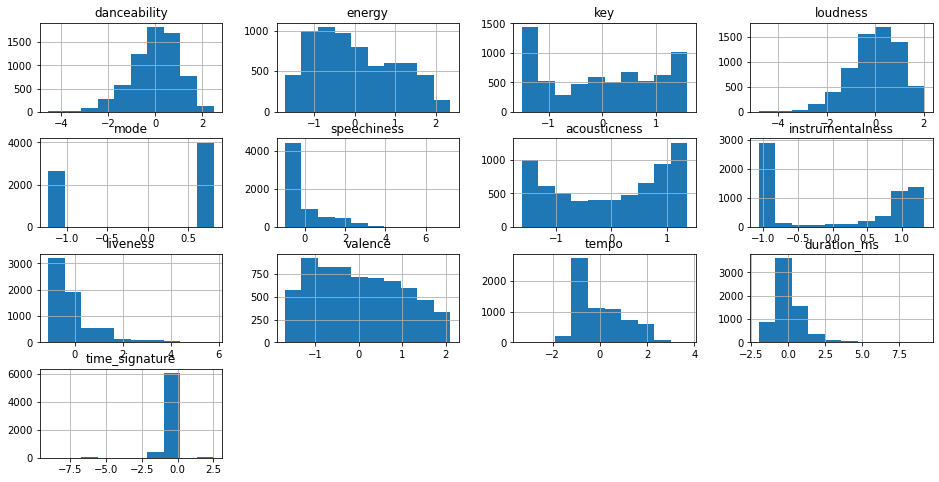

In [65]:
big_df1_clean_scaled_df.hist(figsize = (16,8));

# Finding the Optimal K

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns

In [67]:
kmeans2 = KMeans(n_clusters = 50)
kmeans2.fit(big_df1_clean_scaled_df)
print(kmeans2.inertia_)

29563.292807428785


In [68]:
K = range(25,50)

In [69]:
inertia1 =[]
for k in K:
    kmeans3 = KMeans(n_clusters = k, random_state = 40)
    kmeans3.fit(big_df1_clean_scaled_df)
    inertia1.append(kmeans3.inertia_)
    
print(inertia1)

[35448.01174048205, 35246.784731012376, 34736.87084430854, 34419.06314593945, 34067.95196452863, 33918.03162505052, 33617.36056256549, 33256.366132525225, 33140.984270224246, 32876.39814360018, 32446.421586294324, 32307.757353088564, 32115.113186015846, 31898.564769990808, 31535.079745054107, 31383.276765758885, 31131.503801242736, 31060.620383686604, 30747.518287577128, 30689.330268002886, 30403.093524210086, 30294.17662775359, 30123.104826796072, 29907.84106598287, 29739.37610321124]


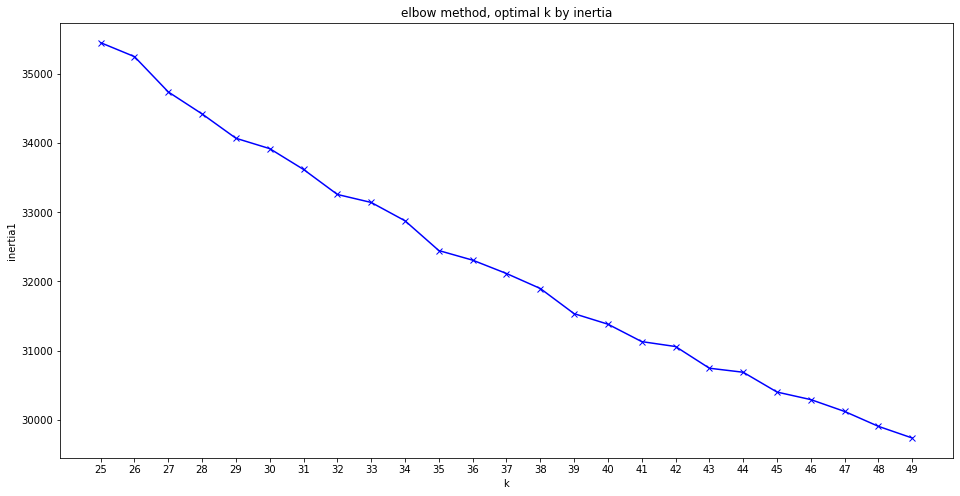

In [70]:
plt.figure(figsize = (16,8))
plt.plot(K, inertia1, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia1')
plt.xticks(np.arange(min(K), max(K) + 1, 1.0))
plt.title('elbow method, optimal k by inertia');

The best k seems to be 43

# Cluster with k = 43

## Cluster 1 - No scaled data

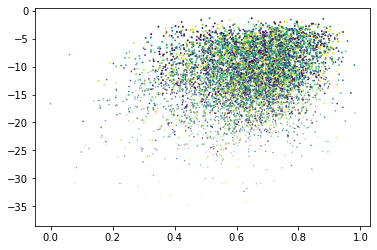

In [71]:
plt.scatter(big_df1_clean.iloc[:,0], big_df1_clean.iloc[:,3], big_df1_clean.iloc[:,1],big_df1_clean.iloc[:,2]);

In [72]:
kmeans1 = KMeans(n_clusters = 43)

In [73]:
cluster1 = kmeans1.fit(big_df1_clean )

In [74]:
cluster1.cluster_centers_

array([[ 6.37054217e-01,  4.19763554e-01,  5.34638554e+00,
        -1.17844608e+01,  6.56626506e-01,  9.06072289e-02,
         5.65684509e-01,  4.38821825e-01,  1.65177410e-01,
         4.68784036e-01,  1.11124623e+02,  1.73432063e+05,
         3.94578313e+00],
       [ 6.40514925e-01,  5.73479104e-01,  5.63432836e+00,
        -9.09479104e+00,  6.11940299e-01,  1.55797761e-01,
         3.67382619e-01,  1.12044708e-01,  1.87018657e-01,
         4.90329851e-01,  1.11293746e+02,  2.58118903e+05,
         3.91044776e+00],
       [ 6.55864407e-01,  3.14097034e-01,  5.50423729e+00,
        -1.36105085e+01,  5.38135593e-01,  1.03322034e-01,
         6.49769068e-01,  7.34339289e-01,  1.55918644e-01,
         3.97719068e-01,  1.10960097e+02,  1.13966720e+05,
         3.87288136e+00],
       [ 5.67809524e-01,  4.84890476e-01,  6.33333333e+00,
        -1.01539524e+01,  3.80952381e-01,  8.99142857e-02,
         5.36544762e-01,  4.23551695e-01,  1.97866667e-01,
         4.81071429e-01,  1.13657762e

In [75]:
cluster1.labels_

array([24, 34, 10, ...,  0, 42, 40], dtype=int32)

In [76]:
big_df1_clean_c = big_df1_clean.copy()
big_df1_clean_c['cluster1'] = cluster1.labels_
big_df1_clean_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster1
"Sing About Me, I'm Dying Of Thirst",0.654,0.753,11,-7.556,0,0.3950,0.303,0.000081,0.130,0.3710,110.722,723573,5,24
Yonkers,0.712,0.759,11,-5.397,1,0.3340,0.016,0.080800,0.217,0.7380,79.103,249333,4,34
Angel Duster,0.507,0.810,6,-6.840,1,0.1050,0.003,0.000008,0.314,0.2070,175.710,309840,5,10
Rhymes Like Dimes,0.644,0.751,0,-5.652,1,0.2680,0.662,0.000000,0.170,0.7590,99.948,258613,4,1
The Last to Say,0.684,0.397,2,-10.319,1,0.0809,0.210,0.000000,0.235,0.0542,83.027,256348,4,1


In [77]:
big_df1_clean_c["cluster1"].value_counts()

6     359
27    352
26    347
31    335
0     333
15    327
18    308
16    291
36    288
39    280
40    274
28    261
11    256
2     236
5     217
30    196
42    183
19    180
9     158
41    148
13    144
1     134
34    120
37    117
38    115
17    106
23     88
35     87
10     74
25     65
4      49
33     34
14     32
22     30
8      29
3      21
29     16
32     11
20     10
7       6
24      3
21      2
12      2
Name: cluster1, dtype: int64

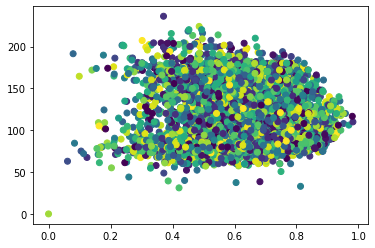

In [78]:
plt.scatter(big_df1_clean_c.iloc[:,0], big_df1_clean_c.iloc[:,10], c = big_df1_clean_c.iloc[:,-1]);

In [79]:
markersize= big_df1_clean_c['tempo']
markercolour= big_df1_clean_c['cluster1']

fig1=go.Scatter3d(x=big_df1_clean_c['danceability'],
                  y=big_df1_clean_c['energy'],
                  z=big_df1_clean_c['acousticness'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Reds'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title="danceability"),
                              yaxis=dict(title='energy'),
                              zaxis=dict(title='acousticness')))

In [80]:
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                   auto_open=True,
                   filename=("5Dplot.html"))

'5Dplot.html'

# Cluster 2 - Scaled data

In [81]:
kmeans4 = KMeans(n_clusters = 43)

In [82]:
cluster4 = kmeans4.fit(big_df1_clean_scaled)

In [83]:
cluster4.cluster_centers_

array([[ 3.16072028e-01,  5.18808840e-02, -3.20968371e-01,
         8.00308686e-02,  7.32255511e-01, -2.10796213e-01,
        -5.09700426e-01,  8.69917447e-01, -2.64434931e-01,
         5.74150410e-01,  1.48834639e+00, -6.84805464e-01,
         1.26864403e-01],
       [-1.02434763e-01,  3.92490340e-02,  8.75089846e-01,
         7.81522074e-02,  8.11472570e-01, -5.34798751e-01,
         1.63573738e-01, -9.89632922e-01, -2.34037518e-01,
         1.03304678e+00,  6.98359076e-02, -2.45616998e-01,
         1.63788276e-01],
       [-1.67271111e+00, -9.67345956e-01, -1.84802603e-01,
        -8.01136800e-01, -1.23232755e+00, -5.17310592e-01,
         9.27260191e-01, -5.28050801e-01, -8.28580993e-02,
        -8.02964210e-01, -6.57921447e-01,  6.79843212e-01,
        -9.77031648e-02],
       [ 5.14186438e-02, -3.26479917e-01,  2.59042226e-01,
        -1.35112245e-01, -1.23232755e+00, -2.95746924e-01,
         4.76749235e-01,  9.09589831e-01, -2.25538900e-01,
        -3.33400812e-01,  1.37153065e

In [84]:
cluster4.labels_

array([18, 10, 24, ...,  5, 22, 20], dtype=int32)

In [85]:
big_df1_clean_scaled_c = big_df1_clean_scaled_df.copy()
big_df1_clean_scaled_c["cluster"] = cluster4.labels_
big_df1_clean_scaled_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.127996,1.363510,1.589710,0.820433,-1.232328,2.535376,-0.708953,-1.062171,-0.318547,-0.273133,-0.025540,7.742411,2.516263,18
1,0.542850,1.388238,1.589710,1.237792,0.811473,1.992466,-1.568099,-0.869582,0.312352,1.140534,-0.964810,0.973275,0.198726,10
2,-0.923445,1.598424,0.184479,0.958844,0.811473,-0.045674,-1.607015,-1.062345,1.015769,-0.904853,1.904985,1.836931,2.516263,24
3,0.056469,1.355268,-1.501798,1.188497,0.811473,1.405054,0.365728,-1.062364,-0.028479,1.221425,-0.345591,1.105734,0.198726,27
4,0.342576,-0.103671,-0.939706,0.286314,0.811473,-0.260168,-0.987352,-1.062364,0.442883,-1.493431,-0.848244,1.073404,0.198726,20


In [86]:
big_df1_clean_scaled_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6624 entries, 0 to 6623
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      6624 non-null   float64
 1   energy            6624 non-null   float64
 2   key               6624 non-null   float64
 3   loudness          6624 non-null   float64
 4   mode              6624 non-null   float64
 5   speechiness       6624 non-null   float64
 6   acousticness      6624 non-null   float64
 7   instrumentalness  6624 non-null   float64
 8   liveness          6624 non-null   float64
 9   valence           6624 non-null   float64
 10  tempo             6624 non-null   float64
 11  duration_ms       6624 non-null   float64
 12  time_signature    6624 non-null   float64
 13  cluster           6624 non-null   int32  
dtypes: float64(13), int32(1)
memory usage: 698.8 KB


plotly.offline.plot({"data":[fig2],
                    "layout":mylayout2},
                   auto_open=True,
                   filename=("5Dplot.html"))

# Create final dataframe

In [87]:
cluster_column = big_df1_clean_scaled_c["cluster"].to_list()

In [88]:
songname_column = big_df1["song_name"].to_list()

In [89]:
artist_column = big_df1["song_artist"].to_list()

In [90]:
songid_column = big_df1["song_ID"].to_list()

In [91]:
final_df=pd.DataFrame({"song_name":songname_column, "song_ID":songid_column, "artist":artist_column, "cluster":cluster_column})

In [92]:
final_df

,song_name,song_ID,artist,cluster
0,"Sing About Me, I'm Dying Of Thirst",1Z2FvDFZSDQ23s4BDqpWqZ,Kendrick Lamar,18
1,Yonkers,4OKXvqtfwlvY2fYJ2lzHPH,"Tyler, The Creator",10
2,Angel Duster,0VLYOGNIaiOxEHKWOctcA4,Run The Jewels,24
3,Rhymes Like Dimes,12OkZyDWNBLUqoReoseGrc,MF DOOM,27
4,The Last to Say,4O7P2Rug3l4IySk0TEx4Xe,Atmosphere,20
...,...,...,...,...
6619,Moth To A Flame (with The Weeknd),2gpWyfu7eZ01zzncHpxOtA,Swedish House Mafia,20
6620,'Til You Can't,13rC4iKtfQocWIfzPOJxaT,Cody Johnson,24
6621,Woman,6Uj1ctrBOjOas8xZXGqKk4,Doja Cat,5
6622,Take My Breath,6OGogr19zPTM4BALXuMQpF,The Weeknd,22


In [93]:
final_df.loc[final_df['song_name'] == "goodnight"]

,song_name,song_ID,artist,cluster
4539,goodnight,7o6pBUyCm2rdHeeJ66W39i,L.Dre,6


# Creating the displayer of the suggested song

In [94]:
from IPython.core.display import display
from IPython.display import IFrame

def recommend(track_id):
	display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
               width="320",
               height="80",
               frameborder="0",
               allowtransparency="true",
               allow="encrypted-media",
              ))

# Creating recomender:

In [95]:
from unidecode import unidecode

In [101]:
for song, artist in final_df.iterrows( ):
    hs = input("""Please type your favourite song or artist of the moment:
    
""")
    hs2 = unidecode(hs.lower().replace(" ",""))
    check = final_df[final_df['song_name'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)] + final_df[final_df['artist'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)]
    suggestion1 = top_100.sample().index.tolist()
    check2 = top_100[top_100['song_name'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)] + top_100[top_100['song_artist'].str.lower().str.replace(" ","").apply(unidecode).str.contains(hs2)]
    index = check.index.tolist()
    if len(check) != 0 or len(check2) != 0:
        answer = input("""
Do you mean """ + final_df.song_name[index].values[0] + """ by """ + final_df.artist[index].values[0] + """?
[y/n]
         
""")
        if answer.lower() == 'y':
            song_cluster = final_df.loc[index, 'cluster'].iloc[0]
            
            if len(check2) != 0:
                
                print("""
Good choice! Your song was one of the Top 100 hot songs in Spain last week!
We think you could enjoy """ + top_100['song_name'][suggestion1].item() + """ by """ + top_100['song_artist'][suggestion1].item() + """.""")
                recommend(top_100['song_ID'][suggestion1].item())
                break
            else:
                final_df_mask = final_df['cluster']== song_cluster
                final_df_filtered = final_df[final_df_mask]
                suggestion2 = final_df_filtered.sample().index.tolist()

                print("""
Interesting choice!
Your song wasn't one of the Top 100 hot songs in Spain last week but it is in our database.
Why don't you try """ + final_df['song_name'][suggestion2].item() + """ by """ + final_df['artist'][suggestion2].item() + """?""")
                recommend(final_df['song_ID'][suggestion2].item())
                break
        else:
            print("""
We're sorry it wasn't the song you expected. Could you type it again trying to be more specific?
            
            """)
            continue
    else:
        results_test= sp.search(q = hs, limit = 1)

        song_name_searched=[]
        song_ID_searched=[]
        song_artist_searched=[]
        playlist=results_test

        for r in results_test: 
            song_ID_searched.append(results_test["tracks"]["items"][0]["id"])
        for r in results_test: 
            song_name_searched.append(results_test["tracks"]["items"][0]["name"])
        for r in results_test:
            song_artist_searched.append(results_test["tracks"]["items"][0]["artists"][0]["name"])

        song_id_searched_df = pd.DataFrame({"song_name":song_name_searched,"song_ID":song_ID_searched,"song_artist":song_artist_searched})

        feats=sp.audio_features(tracks=song_ID_searched)
        audio_feat_df=pd.DataFrame(feats)
        song_input = pd.concat([song_id_searched_df, audio_feat_df], axis=1)
        song_input_drop = song_input.drop(['song_ID',
         'song_artist',
         'type',
         'id',
         'uri',
         'track_href',
         'analysis_url'], axis = 1)
        song_input_drop.index = song_input_drop.iloc[:,0]
        song_input_drop_clean = song_input_drop.iloc[:,1:]
        song_input_drop_clean.rename_axis(None, inplace = True)
        
        
        new=kmeans1.predict(song_input_drop_clean)
        song_input["cluster"] = new
        song_name_searched2 = song_input.index.tolist()
        song_name_searched2
        pred = song_input.loc[song_name_searched2, 'cluster'].iloc[0]
        final_df_mask2 = final_df['cluster']== pred
        final_df_filtered2 = final_df[final_df_mask2]
        suggestion3 = final_df_filtered2.sample().index.tolist()
        answer = input("""
Do you mean """ + song_input.song_name[song_name_searched2].values[0] + """ by """ + song_input.song_artist[song_name_searched2].values[0] + """?
[y/n]
         
""")
        if answer.lower() == 'y':
            
            print("""
Wow, we weren't expecting that choice!
Unfortunatelly, we don't have that song or artist in our database, but based on the features of the song
we can recomend you """ +  final_df['song_name'][suggestion3].item() + """ by """ + final_df['artist'][suggestion3].item() + """.""")
            recommend(final_df['song_ID'][suggestion3].item())
            break
        else:
            print("""
We're sorry it wasn't the song you expected. Could you type it again trying to be more specific?
            
            """)
            continue

Please type your favourite song or artist of the moment:
    
AMARIGLO

Do you mean Amarillo by J Balvin?
[y/n]
         
asdfg

We're sorry it wasn't the song you expected. Could you type it again trying to be more specific?
            
            
Please type your favourite song or artist of the moment:
    
asdfgh

Do you mean Payloon Asdghigner / Twinkle Twinkle Little Star by Taline?
[y/n]
         
aamriglo

We're sorry it wasn't the song you expected. Could you type it again trying to be more specific?
            
            
Please type your favourite song or artist of the moment:
    
amariglo

Do you mean Amarillo by J Balvin?
[y/n]
         
y

Wow, we weren't expecting that choice!
Unfortunatelly, we don't have that song or artist in our database, but based on the features of the song
we can recomend you Soul Food by Goodie Mob.
